# SMV model using original images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from skimage.feature import hog

In [11]:
# Define the parent folder containing the images
parent_folder_path = "/content/drive/MyDrive/US dataset/Original"

# Lists to store the data
images = []
labels = []

# Define the desired dimensions
desired_width = 64
desired_height = 64

# Iterate through the parent folder
for folder in os.listdir(parent_folder_path):
    folder_path = os.path.join(parent_folder_path, folder)
    if not os.path.isdir(folder_path):
        continue

    label = folder

    # Iterate through images in the current folder
    for image_file in os.listdir(folder_path):
        if "_mask" in image_file:
            # Skip images with '_mask' in the file name
            continue

        image_path = os.path.join(folder_path, image_file)

        # Load the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Resize the image to the desired dimensions
        image = cv2.resize(image, (desired_width, desired_height))

        # Append the features and label to the lists
        images.append(image.flatten())
        labels.append(label)

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [13]:
# Calculate the accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.6923076923076923
Classification Report:
              precision    recall  f1-score   support

      benign       0.67      0.97      0.79        87
   malignant       0.78      0.50      0.61        42
      normal       1.00      0.11      0.20        27

    accuracy                           0.69       156
   macro avg       0.81      0.53      0.53       156
weighted avg       0.75      0.69      0.64       156



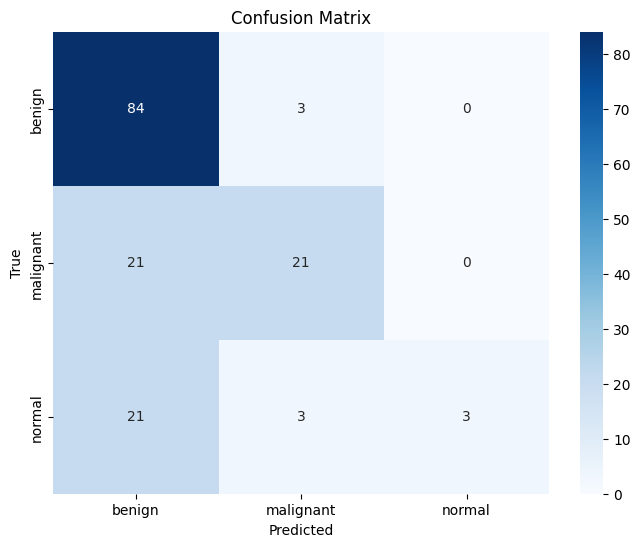

In [14]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()